<a href="https://colab.research.google.com/github/Kazi-Rakib-Hasan-Jawwad/MedMNIST_DL_Benchmark/blob/main/PathMnist_MOBILENET_V3_small_linear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps for connecting to a local runtime:
1. Create a virtual environment (VE) on windows or linux terminal
2. Install dependencies in your VE: jupyter-notebook, medmnist, pytorch-lightning, matplotlib, numpy, pandas, scikit-learn.
3. Put this command in virtual environment terminal:
    
    jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

4. Copy and paste the url from this command to colab's "Connect to a local runtime".

In [ ]:
# If you use hosted runtime, run this cell
!pip install medmnist pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 44.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvid

In [1]:
import medmnist
print(medmnist.__version__)

from medmnist import INFO
!python -m medmnist available

3.0.1
MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
All available datasets:
	pathmnist       | PathMNIST       | Size: 28 (default), 64, 128, 224.
	chestmnist      | ChestMNIST      | Size: 28 (default), 64, 128, 224.
	dermamnist      | DermaMNIST      | Size: 28 (default), 64, 128, 224.
	octmnist        | OCTMNIST        | Size: 28 (default), 64, 128, 224.
	pneumoniamnist  | PneumoniaMNIST  | Size: 28 (default), 64, 128, 224.
	retinamnist     | RetinaMNIST     | Size: 28 (default), 64, 128, 224.
	breastmnist     | BreastMNIST     | Size: 28 (default), 64, 128, 224.
	bloodmnist      | BloodMNIST      | Size: 28 (default), 64, 128, 224.
	tissuemnist     | TissueMNIST     | Size: 28 (default), 64, 128, 224.
	organamnist     | OrganAMNIST     | Size: 28 (default), 64, 128, 224.
	organcmnist     | OrganCMNIST     | Size: 28 (default), 64, 128, 224.
	organsmnist     | OrganSMNIST     | Size: 28 (default), 64, 128, 224.
	organmnist3d    | OrganMNIST3D    | Size: 28 (default), 64.
	

Calculated mean and std values for PathMnist_64 is {tensor([0.7405, 0.5330, 0.7058]) tensor([0.1403, 0.1951, 0.1387])}

Dataset PathMNIST of size 28 (pathmnist)

1.   Number of datapoints: 89996
2.   Root location: /root/.medmnist
3.   Split: train, Task: multi-class, Number of channels: 3 (RGB)
4.   Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
5.   Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
6.   Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.
7.   License: CC BY 4.0


In [2]:
import torch
torch.cuda.is_available()


True

In [3]:
from torch.utils import data
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    # transforms.Normalize([0.7405, 0.5330, 0.7058], [0.1403, 0.1951, 0.1387])
])

In [5]:
num_workers = 6
batch_size = 2048
download = True

info = INFO['pathmnist']
root = "/home/rakib/medical_data/"
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train', transform=transform1, download=download, root=root)
val_dataset = DataClass(split='val', transform=transform1, download=download, root=root)
test_dataset = DataClass(split='test', transform=transform1, download=download, root=root)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

Using downloaded and verified file: /home/rakib/medical_data/pathmnist.npz
Using downloaded and verified file: /home/rakib/medical_data/pathmnist.npz
Using downloaded and verified file: /home/rakib/medical_data/pathmnist.npz


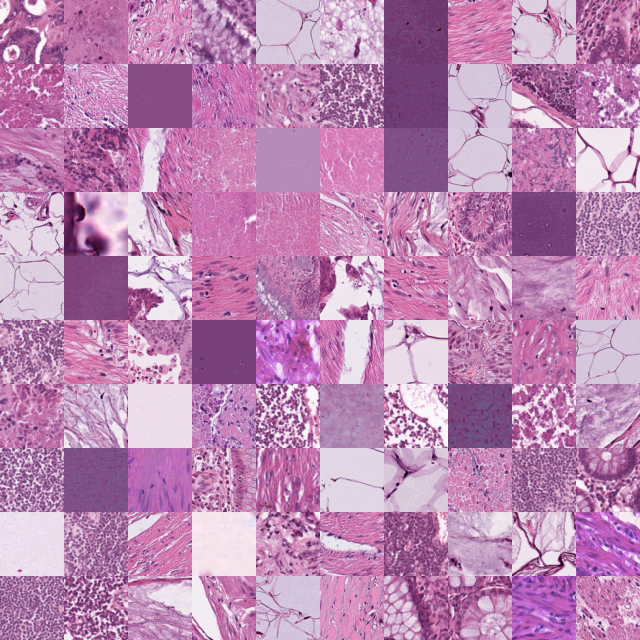

In [ ]:
train_dataset.montage(length=10)

In [6]:
# necessary imports for training
import torch
from torch import nn
from torch.nn import functional as F
from torchmetrics import Accuracy
from torchvision.models import mobilenet_v3_small
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

In [7]:
# mobilenet_v3_small classifier

class pl_ms_Classifier(pl.LightningModule):
    def __init__(self):
        super(pl_ms_Classifier, self).__init__()
        # Load the pre-trained model
        self.mobilenet_v3_small = mobilenet_v3_small(pretrained=False)
        self.mobilenet_v3_small.classifier = nn.Linear(576, 9) # Place linear classification head
        self.accuracy = Accuracy(task="multiclass", num_classes=9)

    def forward(self, x):
        return self.mobilenet_v3_small(x)

    def cross_entropy_loss(self, logits, labels):
        return F.nll_loss(F.log_softmax(logits, dim=1), labels)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y = y.squeeze()  # Adjust labels to be 1D if necessary
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('train_loss', loss, prog_bar=True, logger=True)
        self.log('train_acc', self.accuracy(logits, y), prog_bar=True, logger=True)
        self.log('learning_rate', self.optimizers().param_groups[0]['lr'], prog_bar=True, logger=True)  # Log learning rate
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y = y.squeeze()  # Adjust labels to be 1D if necessary
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('val_loss', loss, prog_bar=True, logger=True)
        self.log('val_acc', self.accuracy(logits, y), prog_bar=True, logger=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y = y.squeeze()  # Adjust labels to be 1D if necessary
        logits = self.forward(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('test_loss', loss)
        self.log('test_acc', self.accuracy(logits, y), prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
        scheduler = {
            'scheduler': lr_scheduler,
            'interval': 'epoch',  # Step the scheduler every epoch
            'frequency': 1,  # Every epoch
        }
        return [optimizer], [scheduler]


In [8]:
model = pl_ms_Classifier()
print(model)

pl_ms_Classifier(
  (mobilenet_v3_small): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
   

/home/rakib/project-6/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rakib/project-6/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
# Initialize the TensorBoard logger
tensorboard_logger = TensorBoardLogger("/home/rakib/checkpoints/mobilenet/", name="")

# Initialize the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='val_acc',      # Metric to monitor
    dirpath='mobilenet/',  # Directory to save checkpoints
    filename='best-checkpoint',  # Filename format
    save_top_k=2,            # Save only the best 2 models
    mode='max'               # Mode to compare metric ('min' for val_loss, 'max' for accuracy)
)

# Initialize the Trainer
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="auto",
    callbacks=[checkpoint_callback],
    logger=tensorboard_logger,  # Pass the TensorBoard logger here
    log_every_n_steps=2
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [10]:
# Train the model
trainer.fit(model, train_loader, val_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/rakib/project-6/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /home/rakib/mobilenet exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type               | Params
----------------------------------------------------------
0 | mobilenet_v3_small | MobileNetV3        | 932 K 
1 | accuracy           | MulticlassAccuracy | 0     
----------------------------------------------------------
932 K     Trainable params
0         Non-trainable params
932 K     Total params
3.729     Total estimated model params size (MB)


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [11]:
# Test the best model
trainer.test(model, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7608634829521179
        test_loss           2.1850345134735107
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 2.1850345134735107, 'test_acc': 0.7608634829521179}]

In [12]:
classes = test_dataset.info["label"]
print(classes)
class_names = [classes[str(i)] for i in range(len(classes))]
print(class_names)

{'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle', 'normal colon mucosa', 'cancer-associated stroma', 'colorectal adenocarcinoma epithelium']


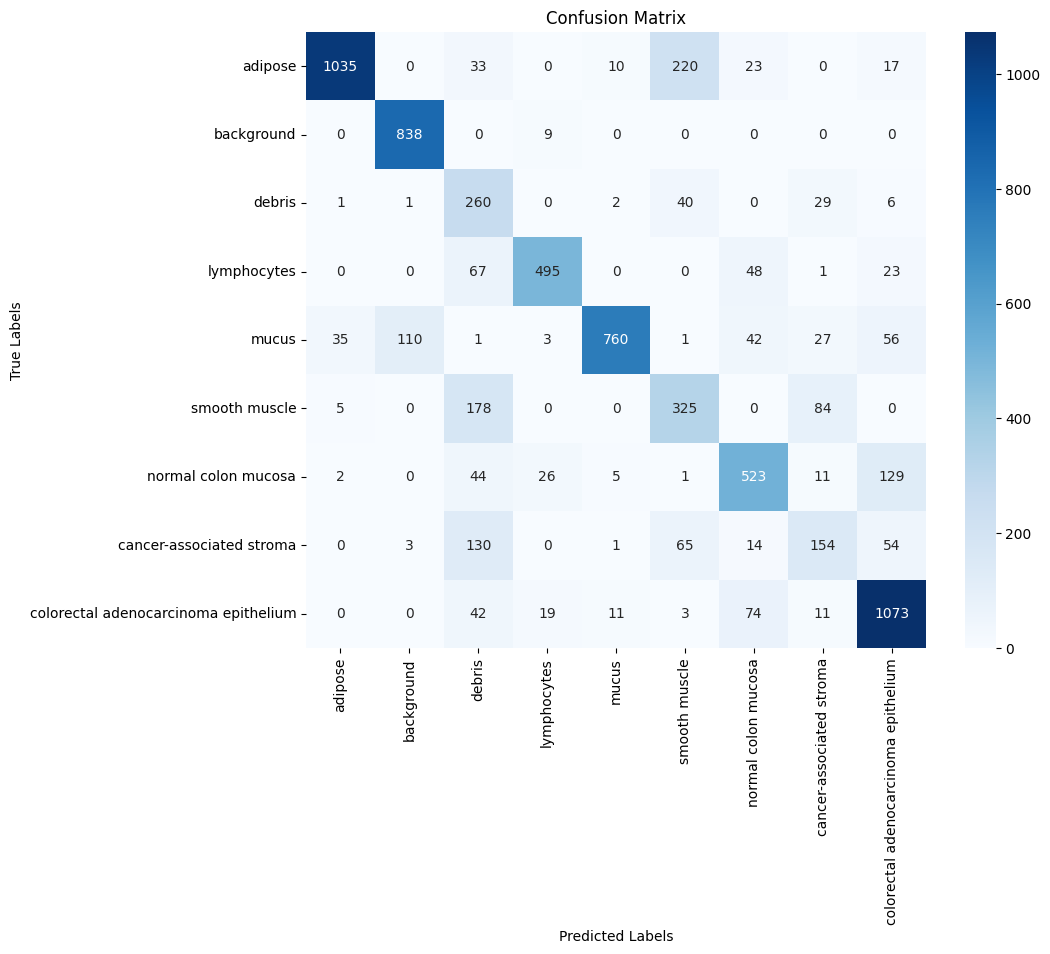

In [14]:
# Assuming 'model' is your trained model, and 'dataloader' is your DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

device = torch.device("cuda")
model.to(device)
model.eval()
true_labels = []
pred_labels = []

with torch.no_grad():
    for x, y in iter(test_loader):
        x = x.to(device)
        y = y.to(device)

        y_pred = model(x)
        y_pred_class = torch.argmax(y_pred, dim=1)  # Get the predicted class

        true_labels.append(y.cpu().numpy())
        pred_labels.append(y_pred_class.cpu().numpy())

# Concatenate the lists to create complete arrays
true_labels = np.concatenate(true_labels)
pred_labels = np.concatenate(pred_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/home/rakib/checkpoints/mobilenet/mbnet_linear_noaugment_cm", dpi=600)
plt.show()

# Augmented Data Train

In [15]:
contrast_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                          transforms.RandomResizedCrop(size=64),
                                          transforms.RandomApply([
                                              transforms.ColorJitter(brightness=0.5,
                                                                     contrast=0.5,
                                                                     saturation=0.5,
                                                                     hue=0.1)
                                          ], p=0.8),
                                          transforms.RandomGrayscale(p=0.2),
                                          transforms.GaussianBlur(kernel_size=9),
                                          transforms.ToTensor()
                                         ])


In [16]:
# main change: transform function

num_workers = 6
batch_size = 2048
download = True

info = INFO['pathmnist']
root = "/home/rakib/medical_data/" # only in local setup
#root = "C:/Users/rakib/medmnist/" # for windows
DataClass = getattr(medmnist, info['python_class'])

# load augnebted training data
aug_train_dataset = DataClass(split='train', transform=contrast_transforms, download=download, size=64, root=root) #root=root only in local setup
aug_val_dataset = DataClass(split='val', transform=contrast_transforms, download=download, size=64, root=root) #root=root only in local setup

# encapsulate data into dataloader form
aug_train_loader = data.DataLoader(dataset=aug_train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
aug_val_loader = data.DataLoader(dataset=aug_val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

Using downloaded and verified file: /home/rakib/medical_data/pathmnist_64.npz
Using downloaded and verified file: /home/rakib/medical_data/pathmnist_64.npz


In [17]:
# Initiate new model
model2 = pl_ms_Classifier()

/home/rakib/project-6/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rakib/project-6/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [18]:
# Initialize the Trainer
trainer2 = pl.Trainer(
    max_epochs=100,
    accelerator="auto",
    callbacks=[checkpoint_callback],
    logger=tensorboard_logger,  # Pass the TensorBoard logger here
    log_every_n_steps=1
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [19]:
# Train the model
trainer2.fit(model2, aug_train_loader, aug_val_loader)

/home/rakib/project-6/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory /home/rakib/mobilenet exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type               | Params
----------------------------------------------------------
0 | mobilenet_v3_small | MobileNetV3        | 932 K 
1 | accuracy           | MulticlassAccuracy | 0     
----------------------------------------------------------
932 K     Trainable params
0         Non-trainable params
932 K     Total params
3.729     Total estimated model params size (MB)


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [20]:
# Test the best model
trainer2.test(model2, test_loader)

# Results without early stopping
# test accuracy: .868802, loss: .830850

# Results with early stopping. stoped at step 1606 (after 72 epoch) [22 step = 1 epoch, for batch size 4096]
# test accuracy: .870473, loss: .900101

# Mobilenet
# | mobilenet_v3_small | MobileNetV3        | 1.5 M
# [{'test_loss': 0.38287410140037537, 'test_acc': 0.883983314037323}]

# Augmentation
#


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8690807819366455
        test_loss           0.3857751786708832
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.3857751786708832, 'test_acc': 0.8690807819366455}]

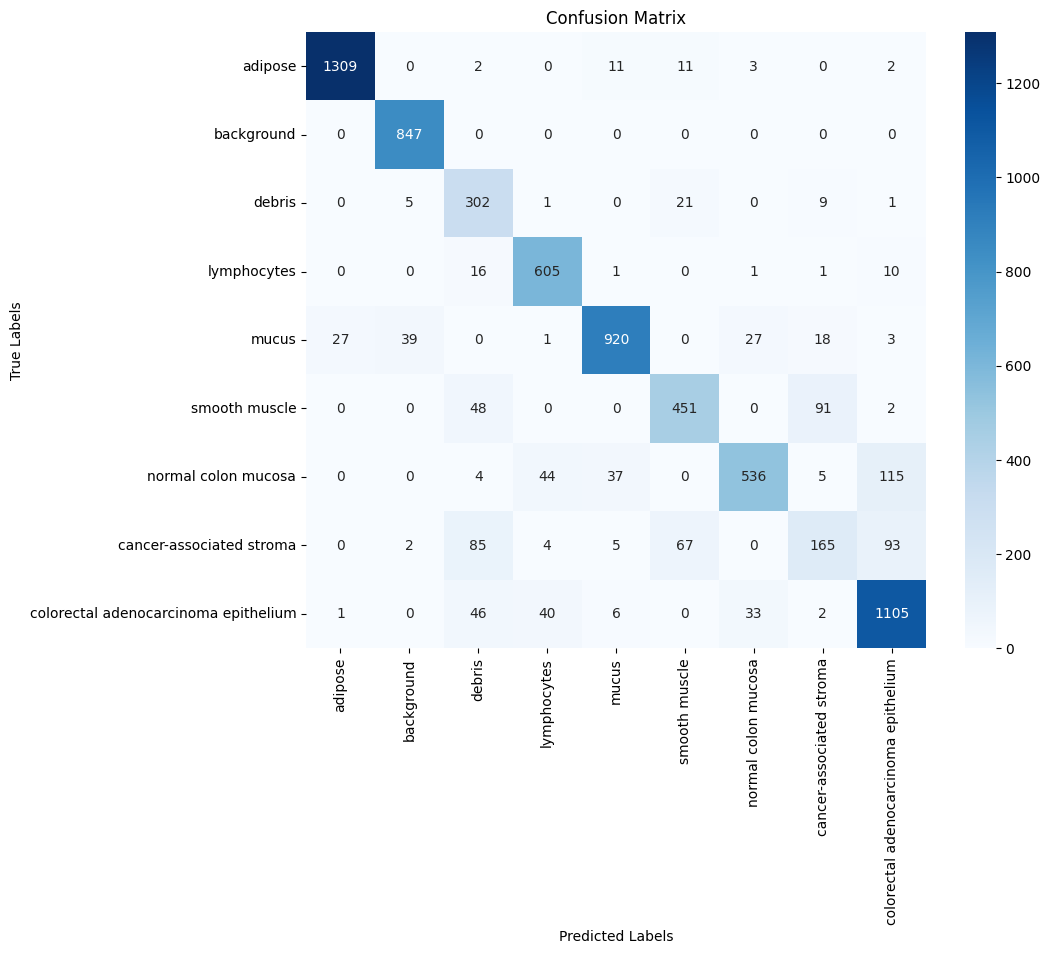

In [21]:
# Assuming 'model' is your trained model, and 'dataloader' is your DataLoader

model2.to(device)
model2.eval()
true_labels = []
pred_labels = []

with torch.no_grad():
    for x, y in iter(test_loader):
        x = x.to(device)
        y = y.to(device)

        y_pred = model2(x)
        y_pred_class = torch.argmax(y_pred, dim=1)  # Get the predicted class

        true_labels.append(y.cpu().numpy())
        pred_labels.append(y_pred_class.cpu().numpy())

# Concatenate the lists to create complete arrays
true_labels = np.concatenate(true_labels)
pred_labels = np.concatenate(pred_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/home/rakib/checkpoints/mobilenet/mbnet_linear_augment_cm", dpi=600)
plt.show()

In [ ]:
# Test the best model
trainer.test(model, test_loader)

# Results without early stopping
# test accuracy: .868802, loss: .830850

# Results with early stopping. stoped at step 1606 (after 72 epoch) [22 step = 1 epoch, for batch size 4096]
# test accuracy: .870473, loss: .900101

# Mobilenet
# (classifier): Default
# | mobilenet_v3_small | MobileNetV3        | 1.5 M
# test_loss': 2.11023211479187, 'test_acc': 0.7850974798202515

# (classifier): Linear(in_features=576, out_features=9, bias=True)
# 0 | mobilenet_v3_small | MobileNetV3        | 932 K
# [{'test_loss': 2.202509641647339, 'test_acc': 0.7566852569580078}]

# Augmented data trained model
# [{'test_loss': 2.4061145782470703, 'test_acc': 0.733843982219696}]
# [{'test_loss': 0.6869655251502991, 'test_acc': 0.7713091969490051}]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7566852569580078
        test_loss            2.202509641647339
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 2.202509641647339, 'test_acc': 0.7566852569580078}]